#### Darrah 2020 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Darrah 2020 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Computational Health Centre, Helmholtz Munich
- **v230307**

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
plt.subplots_adjust(wspace=0.1)
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
anyio               NA
appnope             0.1.3
arrow               1.2.3
asttokens           NA
attr                22.2.0
babel               2.12.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
fqdn                NA
future              0.18.3
h5py                3.8.0
hypergeom_ufunc     NA
idna                3.4
igraph              0.10.4
ipykernel           6.21.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonpointer 

<Figure size 640x480 with 0 Axes>

### Read in datasets

In [3]:
adata_wk13 = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/Darrah2020/SCP796/SCP796_Week13_postBCG.raw.h5ad')
adata_wk13

AnnData object with n_obs × n_vars = 98993 × 32681
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage'

In [4]:
adata_wk25 = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/Darrah2020/SCP796/SCP796_Week25_postBCG.raw.h5ad')
adata_wk25

AnnData object with n_obs × n_vars = 63497 × 32580
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage'

In [5]:
adata_wk25.var

""
A1BG
A1CF
A2M
A2ML1
A3GALT2
...
ZYG11A
ZYG11B
ZYX
ZZEF1


In [6]:
# Make names unique to avoid computational issues re repeated gene names
adata_wk13.var_names_make_unique()
adata_wk25.var_names_make_unique()

### Concatenate objects

In [7]:
adata_total = adata_wk13.concatenate(adata_wk25, join='inner', batch_key='timepoint', batch_categories=['13', '25'])
adata_total

/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 162490 × 32437
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage', 'timepoint'

In [8]:
adata_total.obs

,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,cellID,organ,organ__ontology_label,vaccination,vaccination__ontology_label,sex,...,sequencing_instrument_manufacturer_model,sequencing_instrument_manufacturer_model__ontology_label,paired_ends,read_length,vaccination_route,vaccination__time_since,vaccination__time_since__unit,vaccination__time_since__unit_label,vaccination__dosage,timepoint
Week13_DF16_100-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_100,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1000-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1000,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1002-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1002,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1004-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1004,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1005-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1005,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week25_OVN.stim_995-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_995,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_996-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_996,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_997-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_997,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_998-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_998,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25


In [9]:
sample_object = adata_total.copy()
sample_object

AnnData object with n_obs × n_vars = 162490 × 32437
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage', 'timepoint'

In [10]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:02)


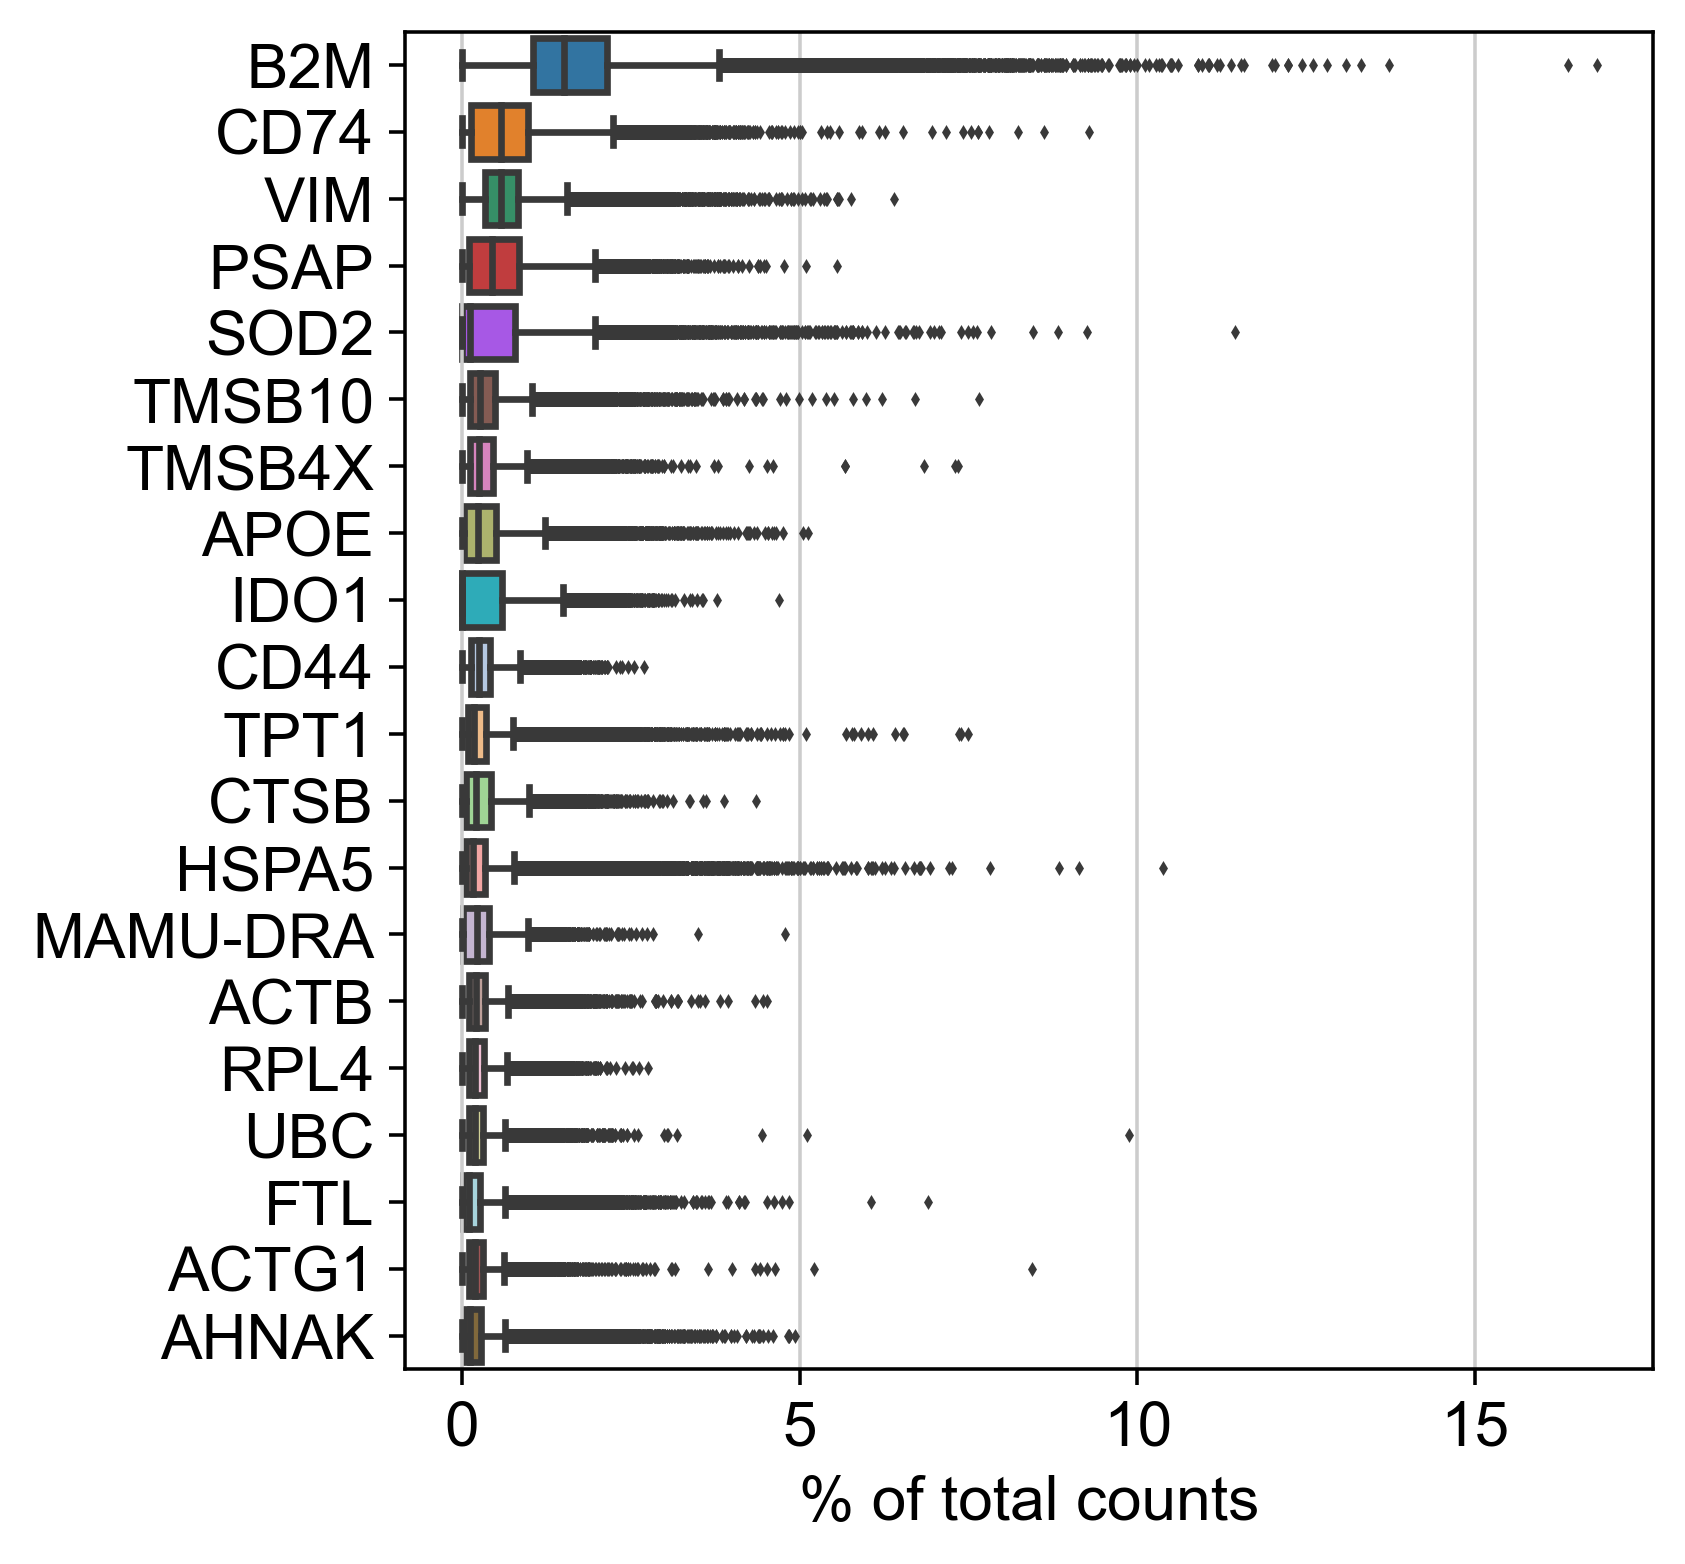

In [11]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

- By gene

In [12]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

162490 32437


- By cells

In [13]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 538 genes that are detected in less than 3 cells


(162490, 31899)

### QC metrics

In [14]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

,n_cells,mt,ribo,hb
A1BG,78,False,False,False
A1CF,37,False,False,False
A2M,36707,False,False,False
A2ML1,287,False,False,False
A3GALT2,59,False,False,False
...,...,...,...,...
ZYG11A,127,False,False,False
ZYG11B,9329,False,False,False
ZYX,51262,False,False,False
ZZEF1,35521,False,False,False


In [15]:
sample_object.var['mt'].value_counts()

False    31824
True        75
Name: mt, dtype: int64

In [16]:
sample_object.var['ribo'].value_counts()

False    31808
True        91
Name: ribo, dtype: int64

In [17]:
sample_object.var['hb'].value_counts()

False    31889
True        10
Name: hb, dtype: int64

In [18]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [19]:
sample_object.obs

,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,cellID,organ,organ__ontology_label,vaccination,vaccination__ontology_label,sex,...,timepoint,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
Week13_DF16_100-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_100,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,8284,8284,56498.0,348.0,0.615951,1267.0,2.242557,8.0,0.014160
Week13_DF16_1000-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1000,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2756,2756,8616.0,37.0,0.429434,630.0,7.311977,0.0,0.000000
Week13_DF16_1002-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1002,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2828,2828,8539.0,24.0,0.281063,252.0,2.951165,0.0,0.000000
Week13_DF16_1004-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1004,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2686,2686,7445.0,28.0,0.376091,170.0,2.283412,4.0,0.053727
Week13_DF16_1005-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1005,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2900,2900,7886.0,28.0,0.355060,369.0,4.679178,4.0,0.050723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week25_OVN.stim_995-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_995,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,25,1549,1549,2531.0,11.0,0.434611,148.0,5.847491,1.0,0.039510
Week25_OVN.stim_996-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_996,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,25,1405,1405,2419.0,5.0,0.206697,173.0,7.151715,0.0,0.000000
Week25_OVN.stim_997-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_997,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,25,1363,1363,2276.0,9.0,0.395431,183.0,8.040421,1.0,0.043937
Week25_OVN.stim_998-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_998,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,25,1541,1541,2680.0,8.0,0.298507,172.0,6.417911,2.0,0.074627


In [20]:
sample_object

AnnData object with n_obs × n_vars = 162490 × 31899
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage', 'timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'n_cells', 'mt', 'ribo', 'hb', 'n_cells

In [21]:
sample_object.obs.donor_id.value_counts()

DFF3    17465
DG44    13771
DF8P    13652
DFW7    13491
DF16    13182
DFC3    12041
DFT3    12015
HBZ     11376
DF4E    11293
OPH      9336
OLB      9321
O6T      6902
OVN      6659
OC6      6417
DF4N     5569
Name: donor_id, dtype: int64

### QC visualisation

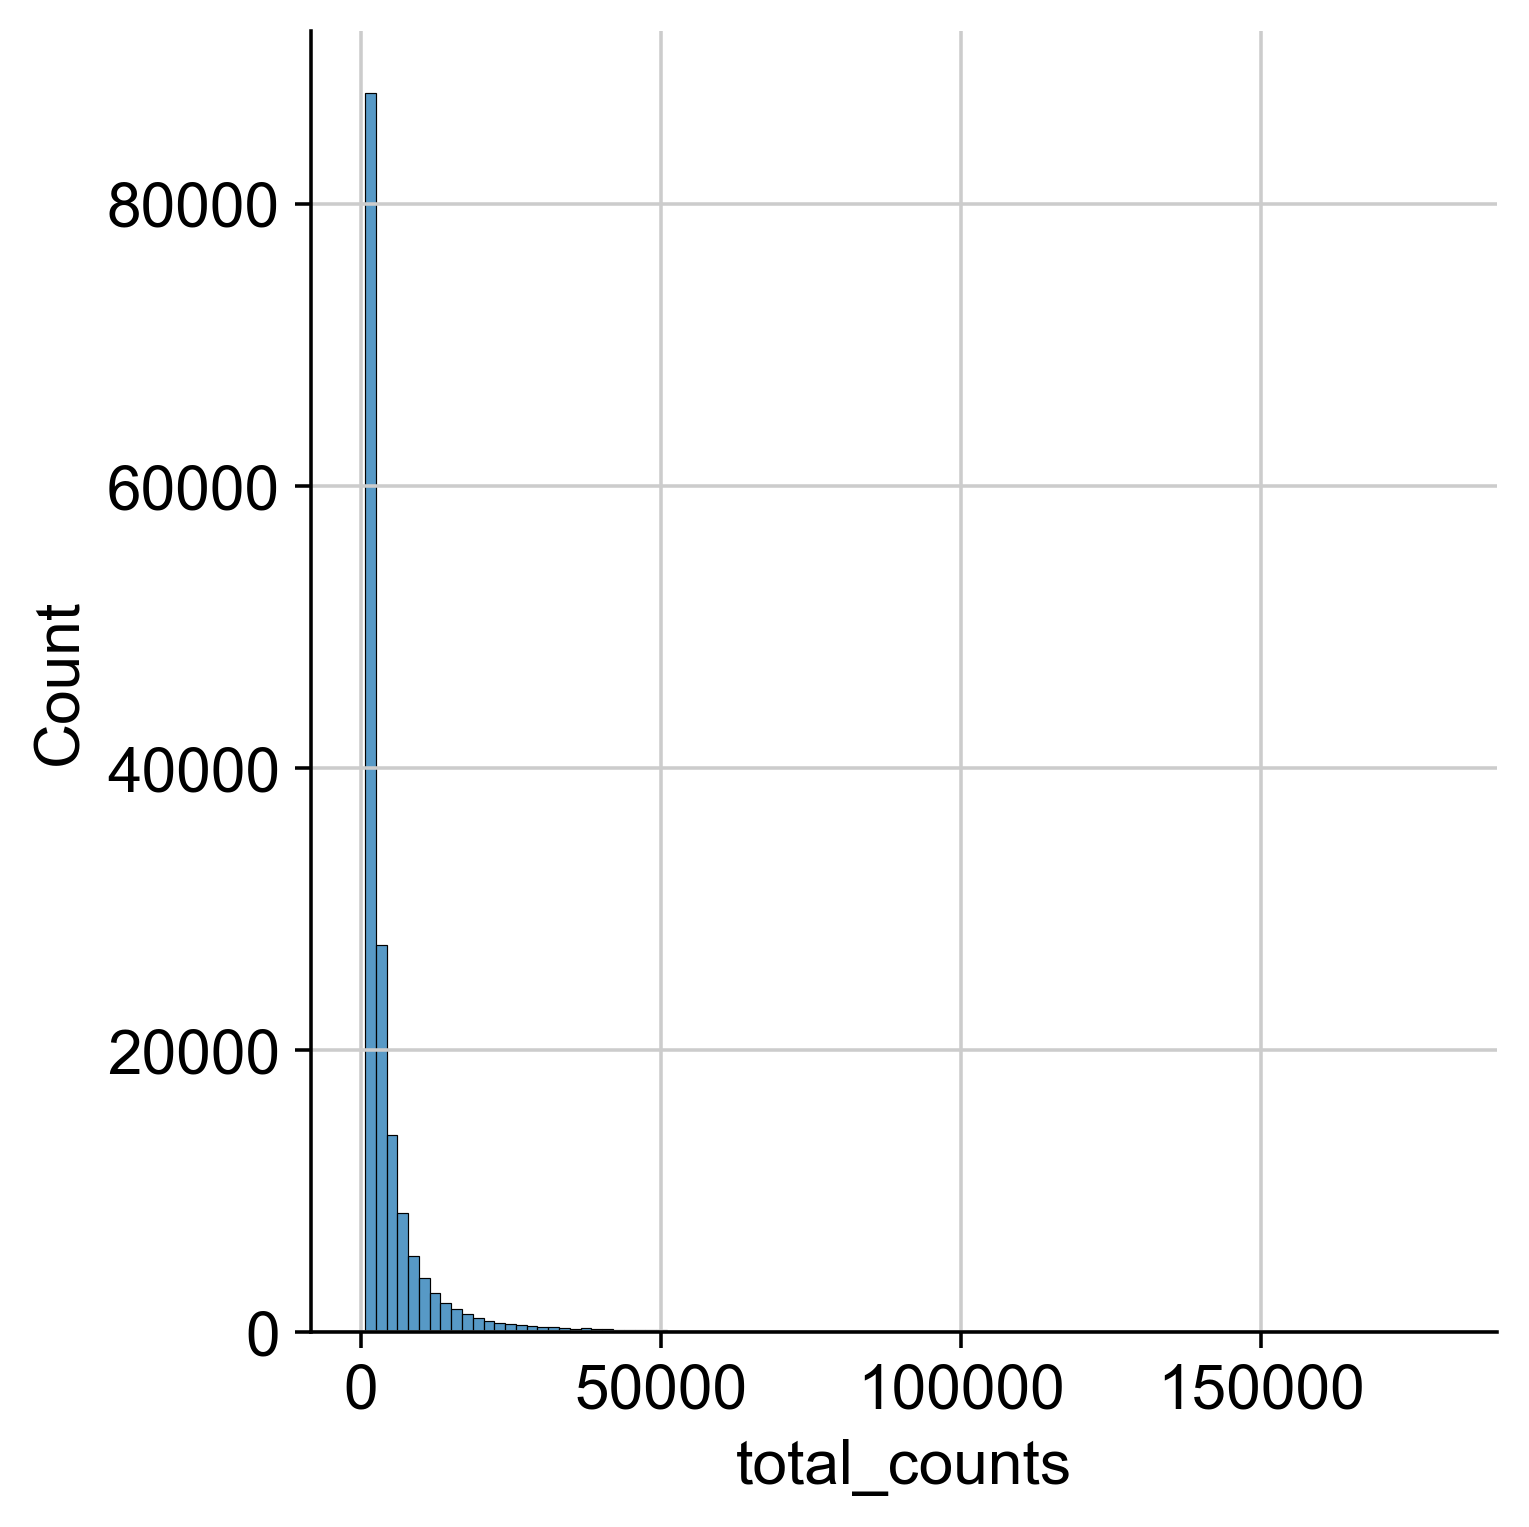

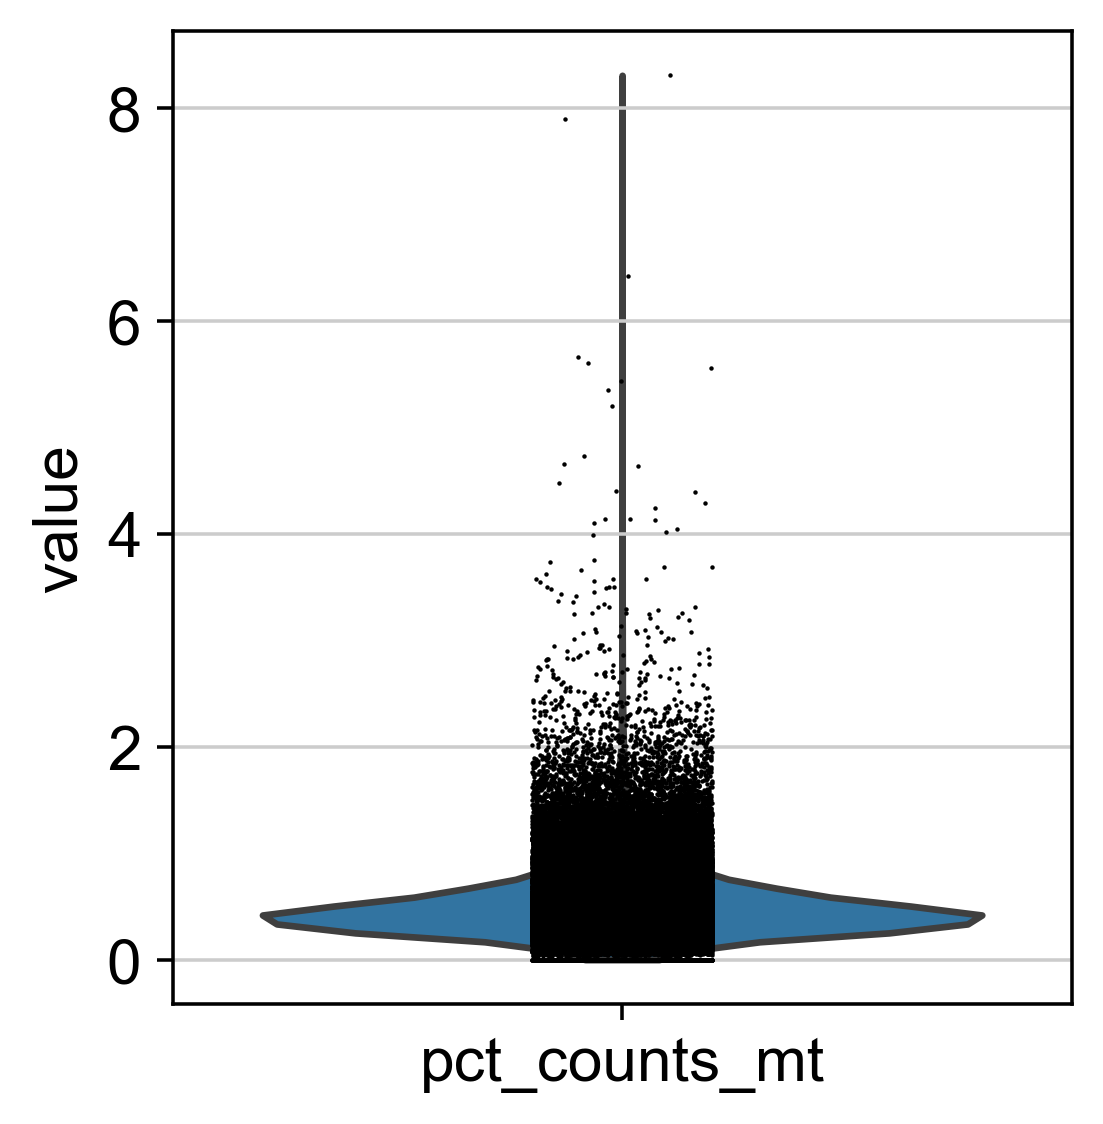

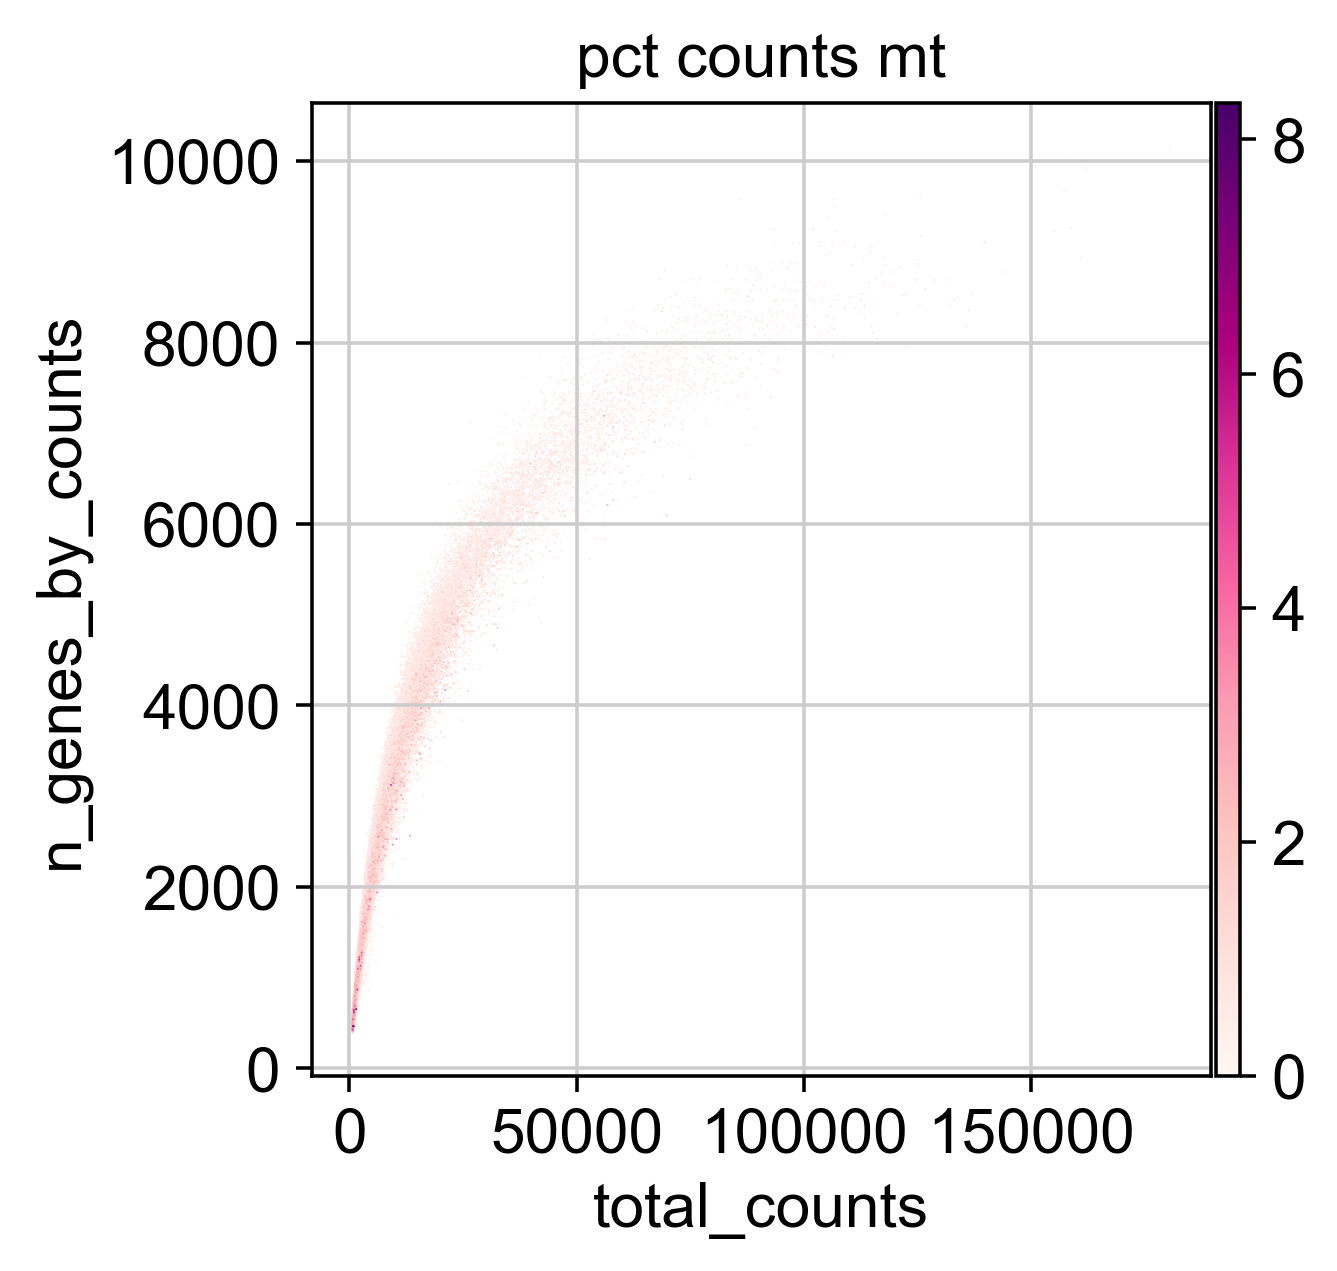

In [22]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

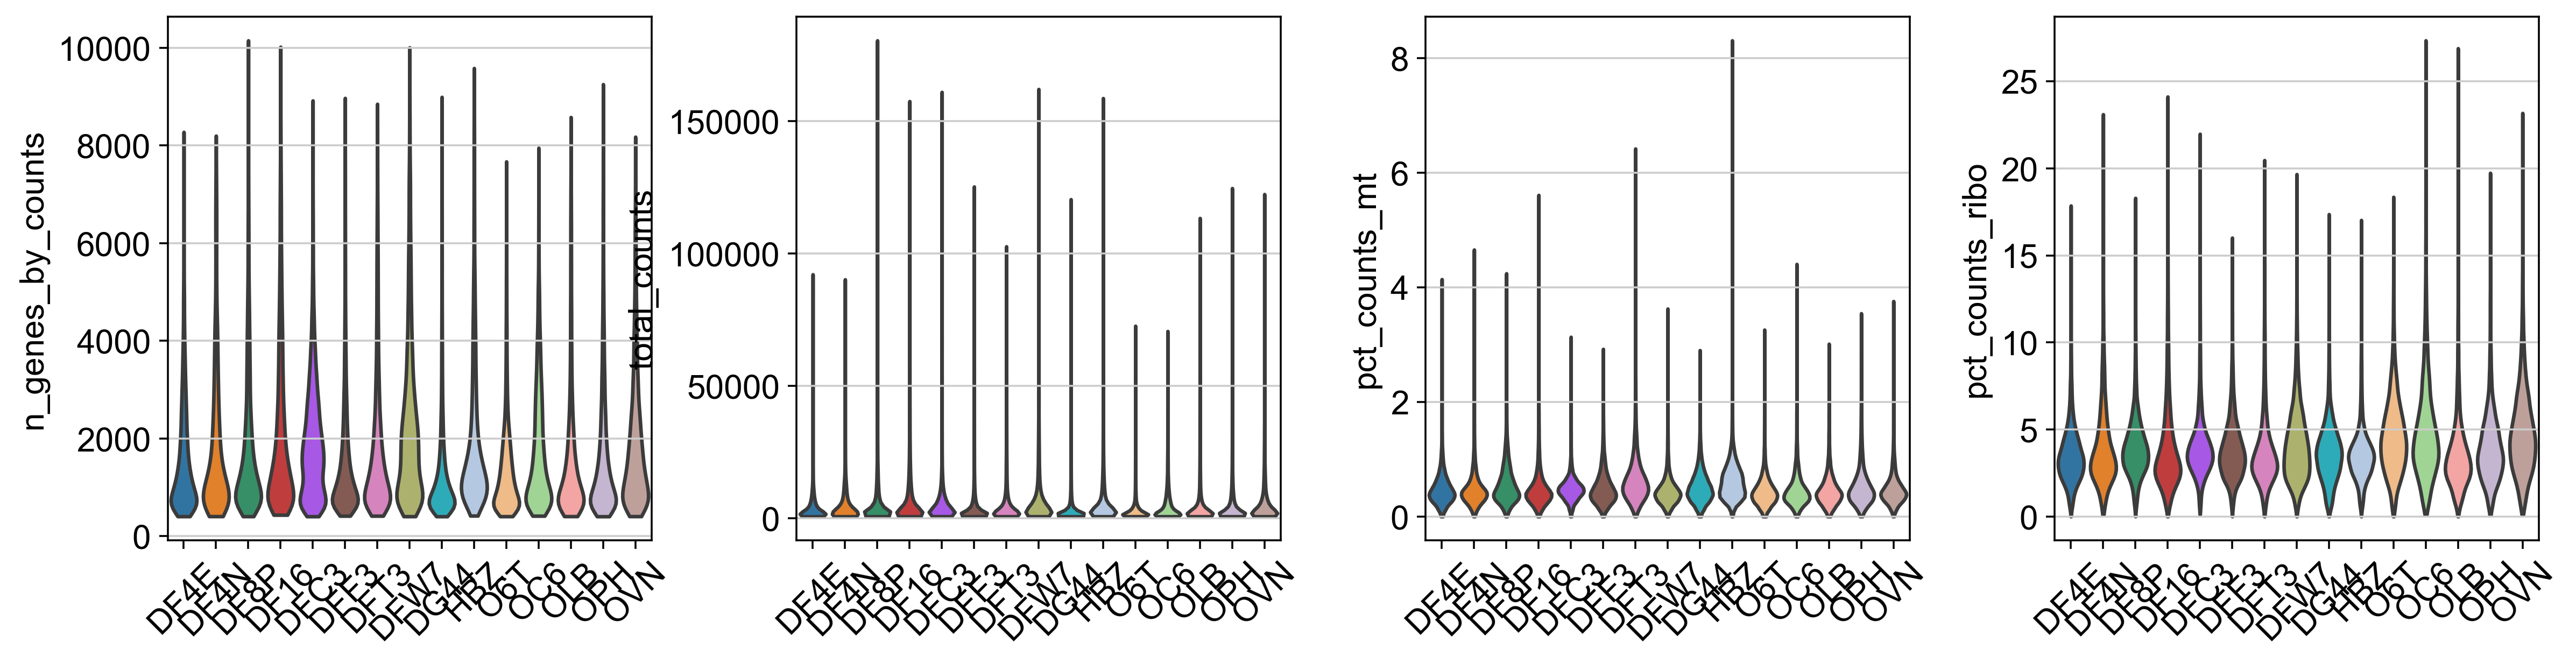

In [23]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, groupby = 'donor_id', rotation = 45, stripplot=False)

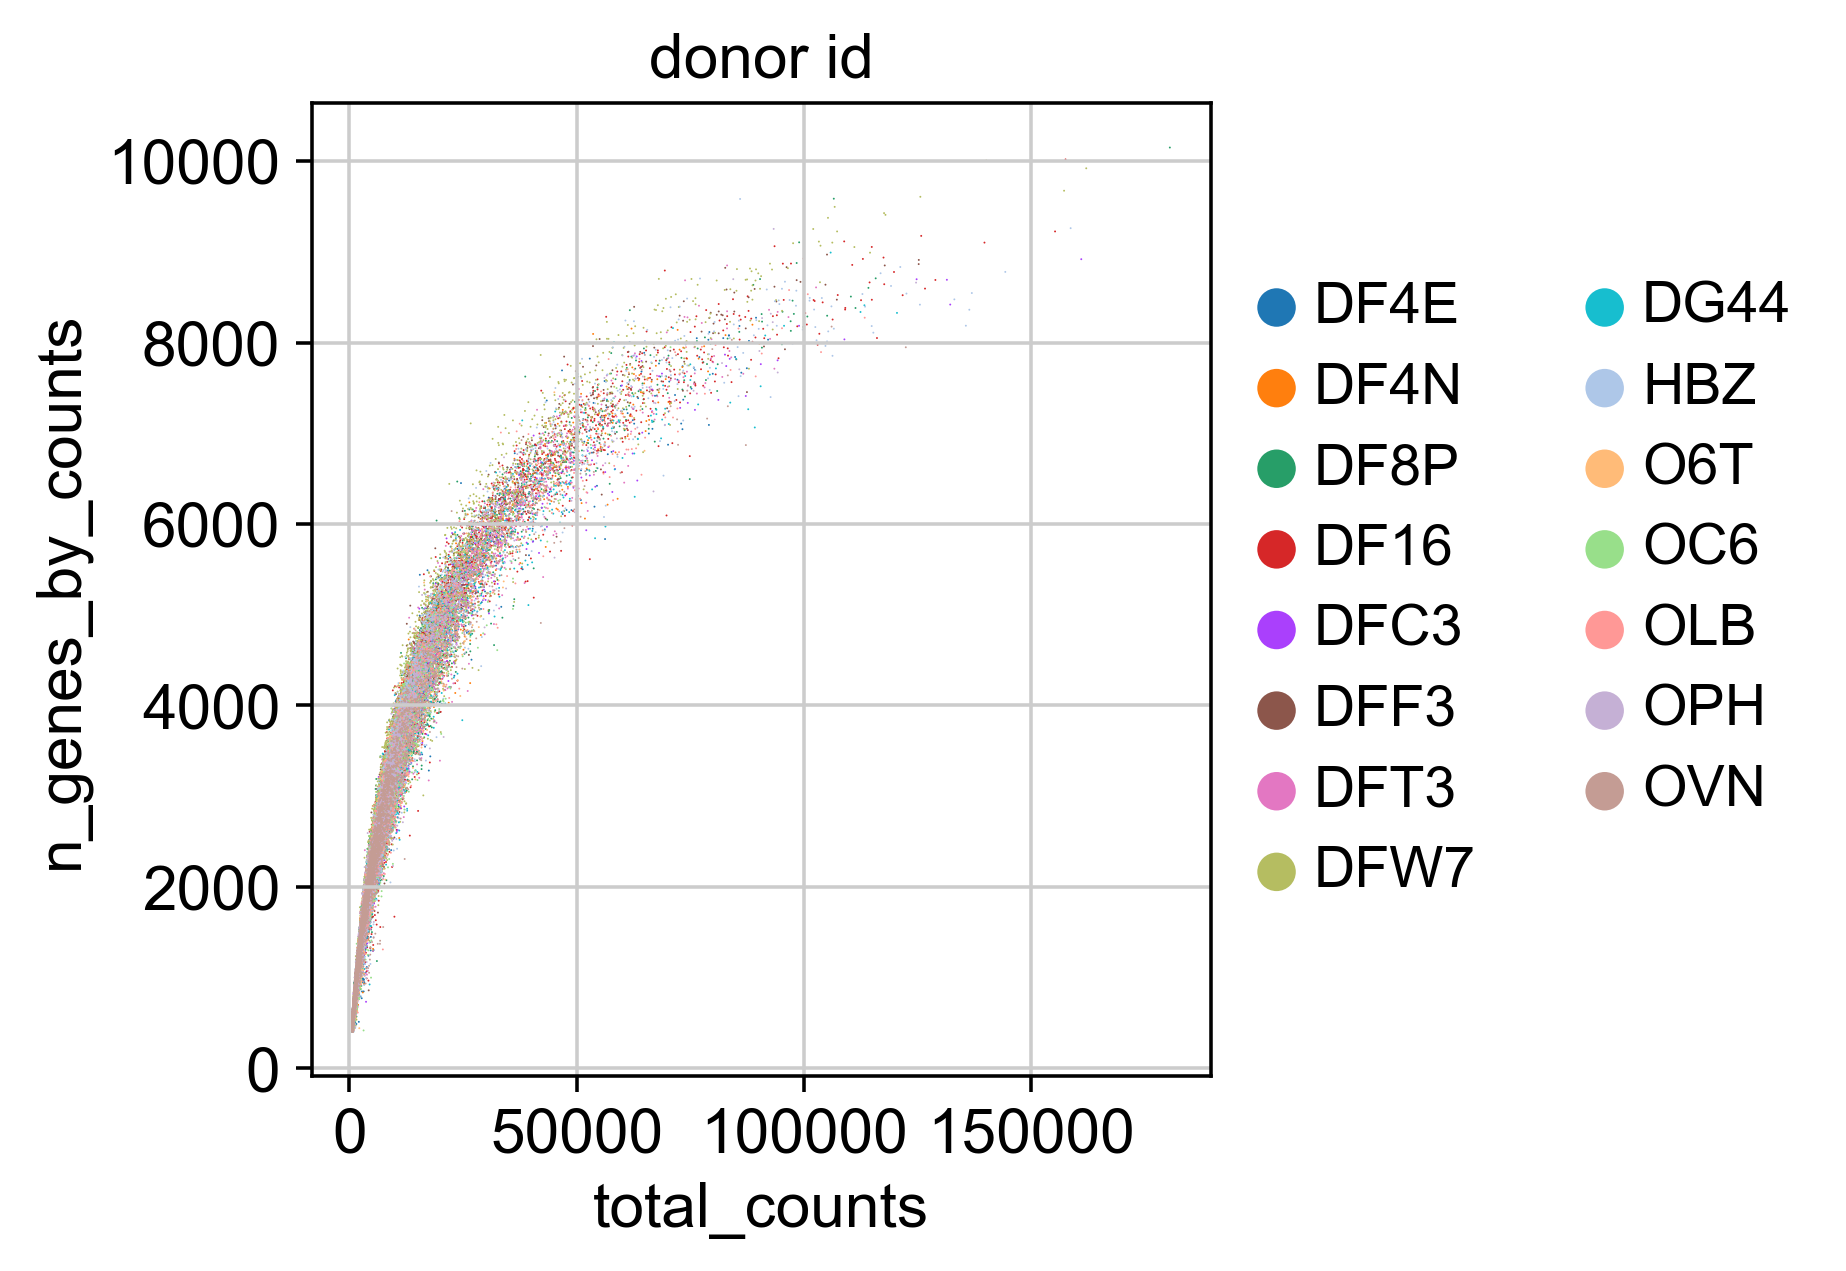

In [24]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor_id")

### QC-based filtering

In [25]:
sample_object.obs.head()

,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,cellID,organ,organ__ontology_label,vaccination,vaccination__ontology_label,sex,...,timepoint,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
Week13_DF16_100-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_100,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,8284,8284,56498.0,348.0,0.615951,1267.0,2.242557,8.0,0.014160
Week13_DF16_1000-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1000,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2756,2756,8616.0,37.0,0.429434,630.0,7.311977,0.0,0.000000
Week13_DF16_1002-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1002,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2828,2828,8539.0,24.0,0.281063,252.0,2.951165,0.0,0.000000
Week13_DF16_1004-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1004,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2686,2686,7445.0,28.0,0.376091,170.0,2.283412,4.0,0.053727
Week13_DF16_1005-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1005,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,13,2900,2900,7886.0,28.0,0.355060,369.0,4.679178,4.0,0.050723


In [26]:
sample_object.shape

(162490, 31899)

In [27]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()

,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,cellID,organ,organ__ontology_label,vaccination,vaccination__ontology_label,sex,...,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok
Week13_DF16_100-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_100,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,8284,8284,56498.0,348.0,0.615951,1267.0,2.242557,8.0,0.014160,True
Week13_DF16_1000-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1000,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,2756,2756,8616.0,37.0,0.429434,630.0,7.311977,0.0,0.000000,True
Week13_DF16_1002-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1002,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,2828,2828,8539.0,24.0,0.281063,252.0,2.951165,0.0,0.000000,True
Week13_DF16_1004-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1004,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,2686,2686,7445.0,28.0,0.376091,170.0,2.283412,4.0,0.053727,True
Week13_DF16_1005-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1005,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,2900,2900,7886.0,28.0,0.355060,369.0,4.679178,4.0,0.050723,True


In [28]:
sample_object.obs.mt_ok.value_counts()

True    162490
Name: mt_ok, dtype: int64

In [29]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 162490
Number of cells after filtering of low quality cells: 162490


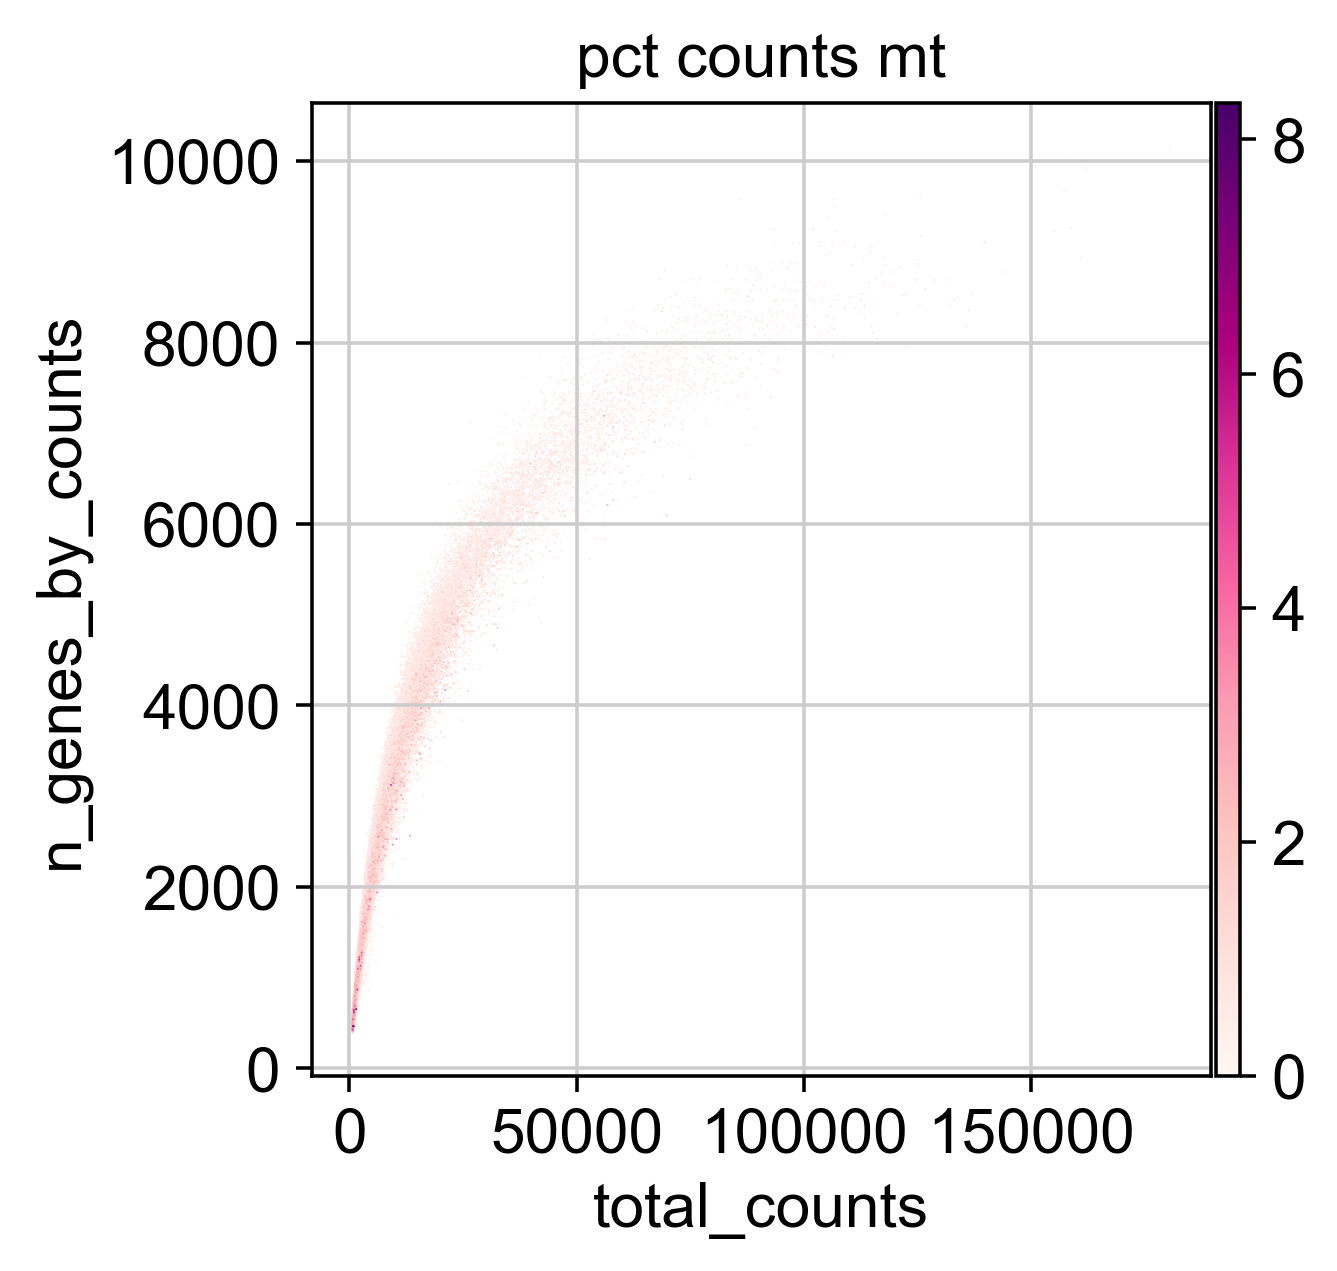

In [30]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [31]:
annot = sc.queries.biomart_annotations("mmulatta", ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [32]:
annot.head

<bound method NDFrame.head of                        ensembl_gene_id  start_position  end_position  \
external_gene_name                                                     
NaN                 ENSMMUG00000023296            8231         26653   
U6                  ENSMMUG00000036181           14267         14369   
ZNF692              ENSMMUG00000000634           71582         83178   
ZNF672              ENSMMUG00000037875           81258         91679   
SH3BP5L             ENSMMUG00000000632          102662        117835   
...                                ...             ...           ...   
ND6                 ENSMMUG00000065359           14140         14667   
NaN                 ENSMMUG00000065371           14668         14736   
CYTB                ENSMMUG00000065382           14741         15881   
NaN                 ENSMMUG00000065386           15882         15945   
NaN                 ENSMMUG00000065355           15946         16014   

                   chromosome_nam

- Y chrom

In [33]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['AMELY', 'DDX3Y', 'EIF1AY', 'KDM5D', 'NLGN4Y', 'RPS4Y1', 'RPS4Y2',
       'SRY', 'TBL1Y', 'USP9Y', 'UTY', 'XKR3', 'ZFY'],
      dtype='object')

In [34]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

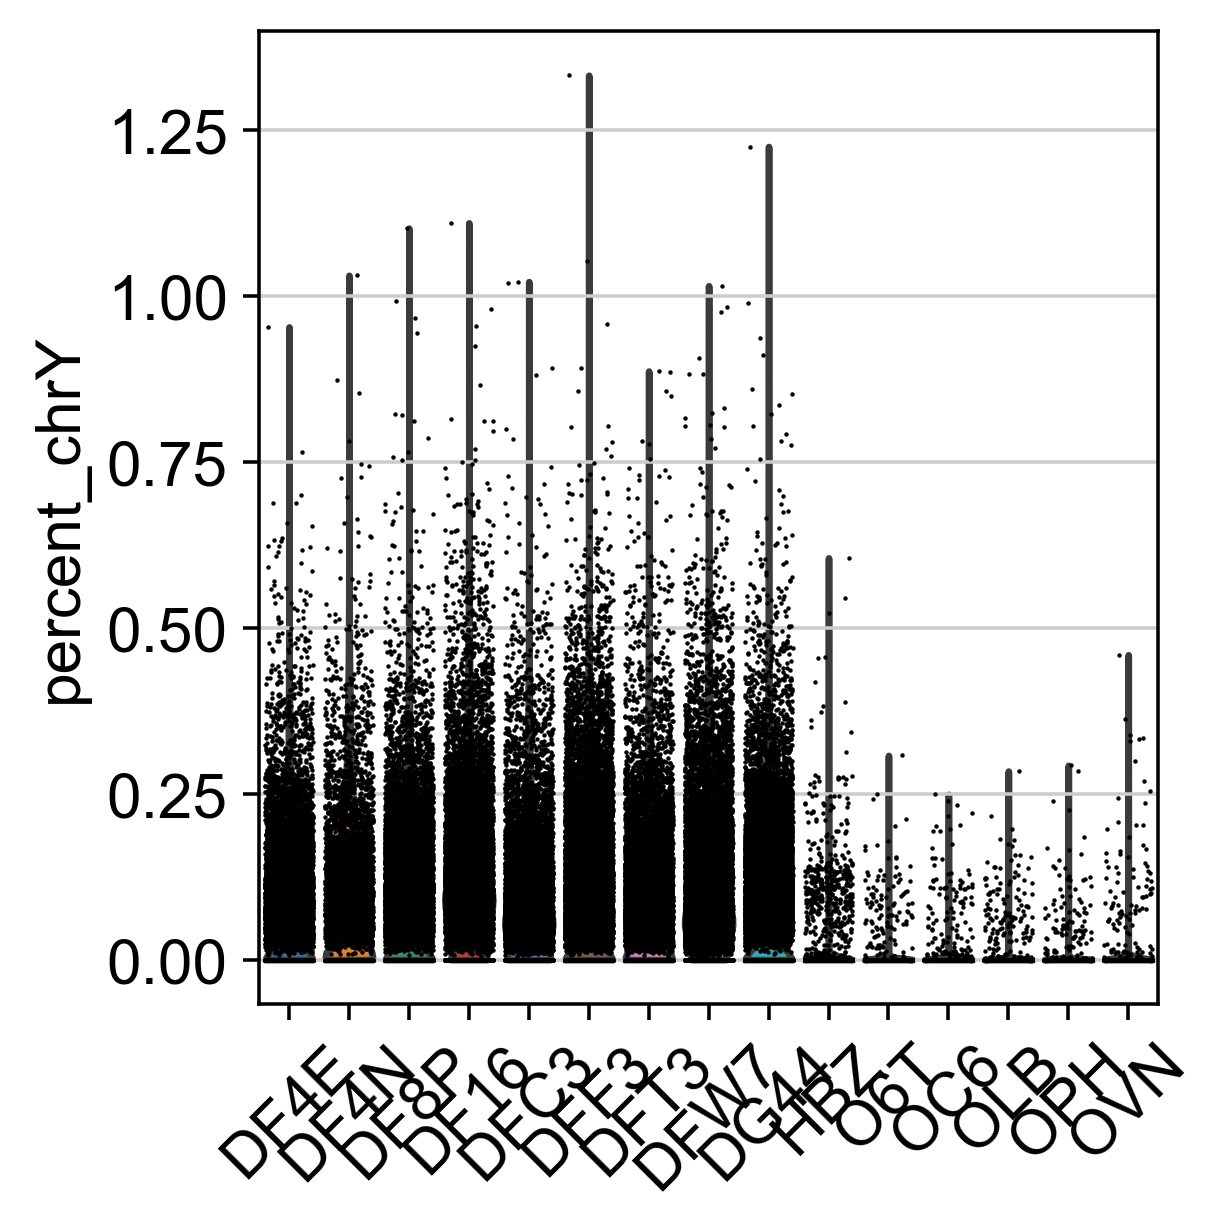

In [35]:
sc.pl.violin(sample_object, ["percent_chrY"], jitter = 0.4, groupby = 'donor_id', rotation = 45)

- X chrom

In [36]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['ABCB7', 'ABCD1', 'ACE2', 'ACOT9', 'ACSL4', 'ACTRT1', 'ADGRG2',
       'ADGRG4', 'AFF2', 'AGTR2',
       ...
       'ZNF157', 'ZNF182', 'ZNF280C', 'ZNF41', 'ZNF449', 'ZNF674', 'ZNF711',
       'ZNF75D', 'ZNF81', 'ZRSR2'],
      dtype='object', length=562)

In [37]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

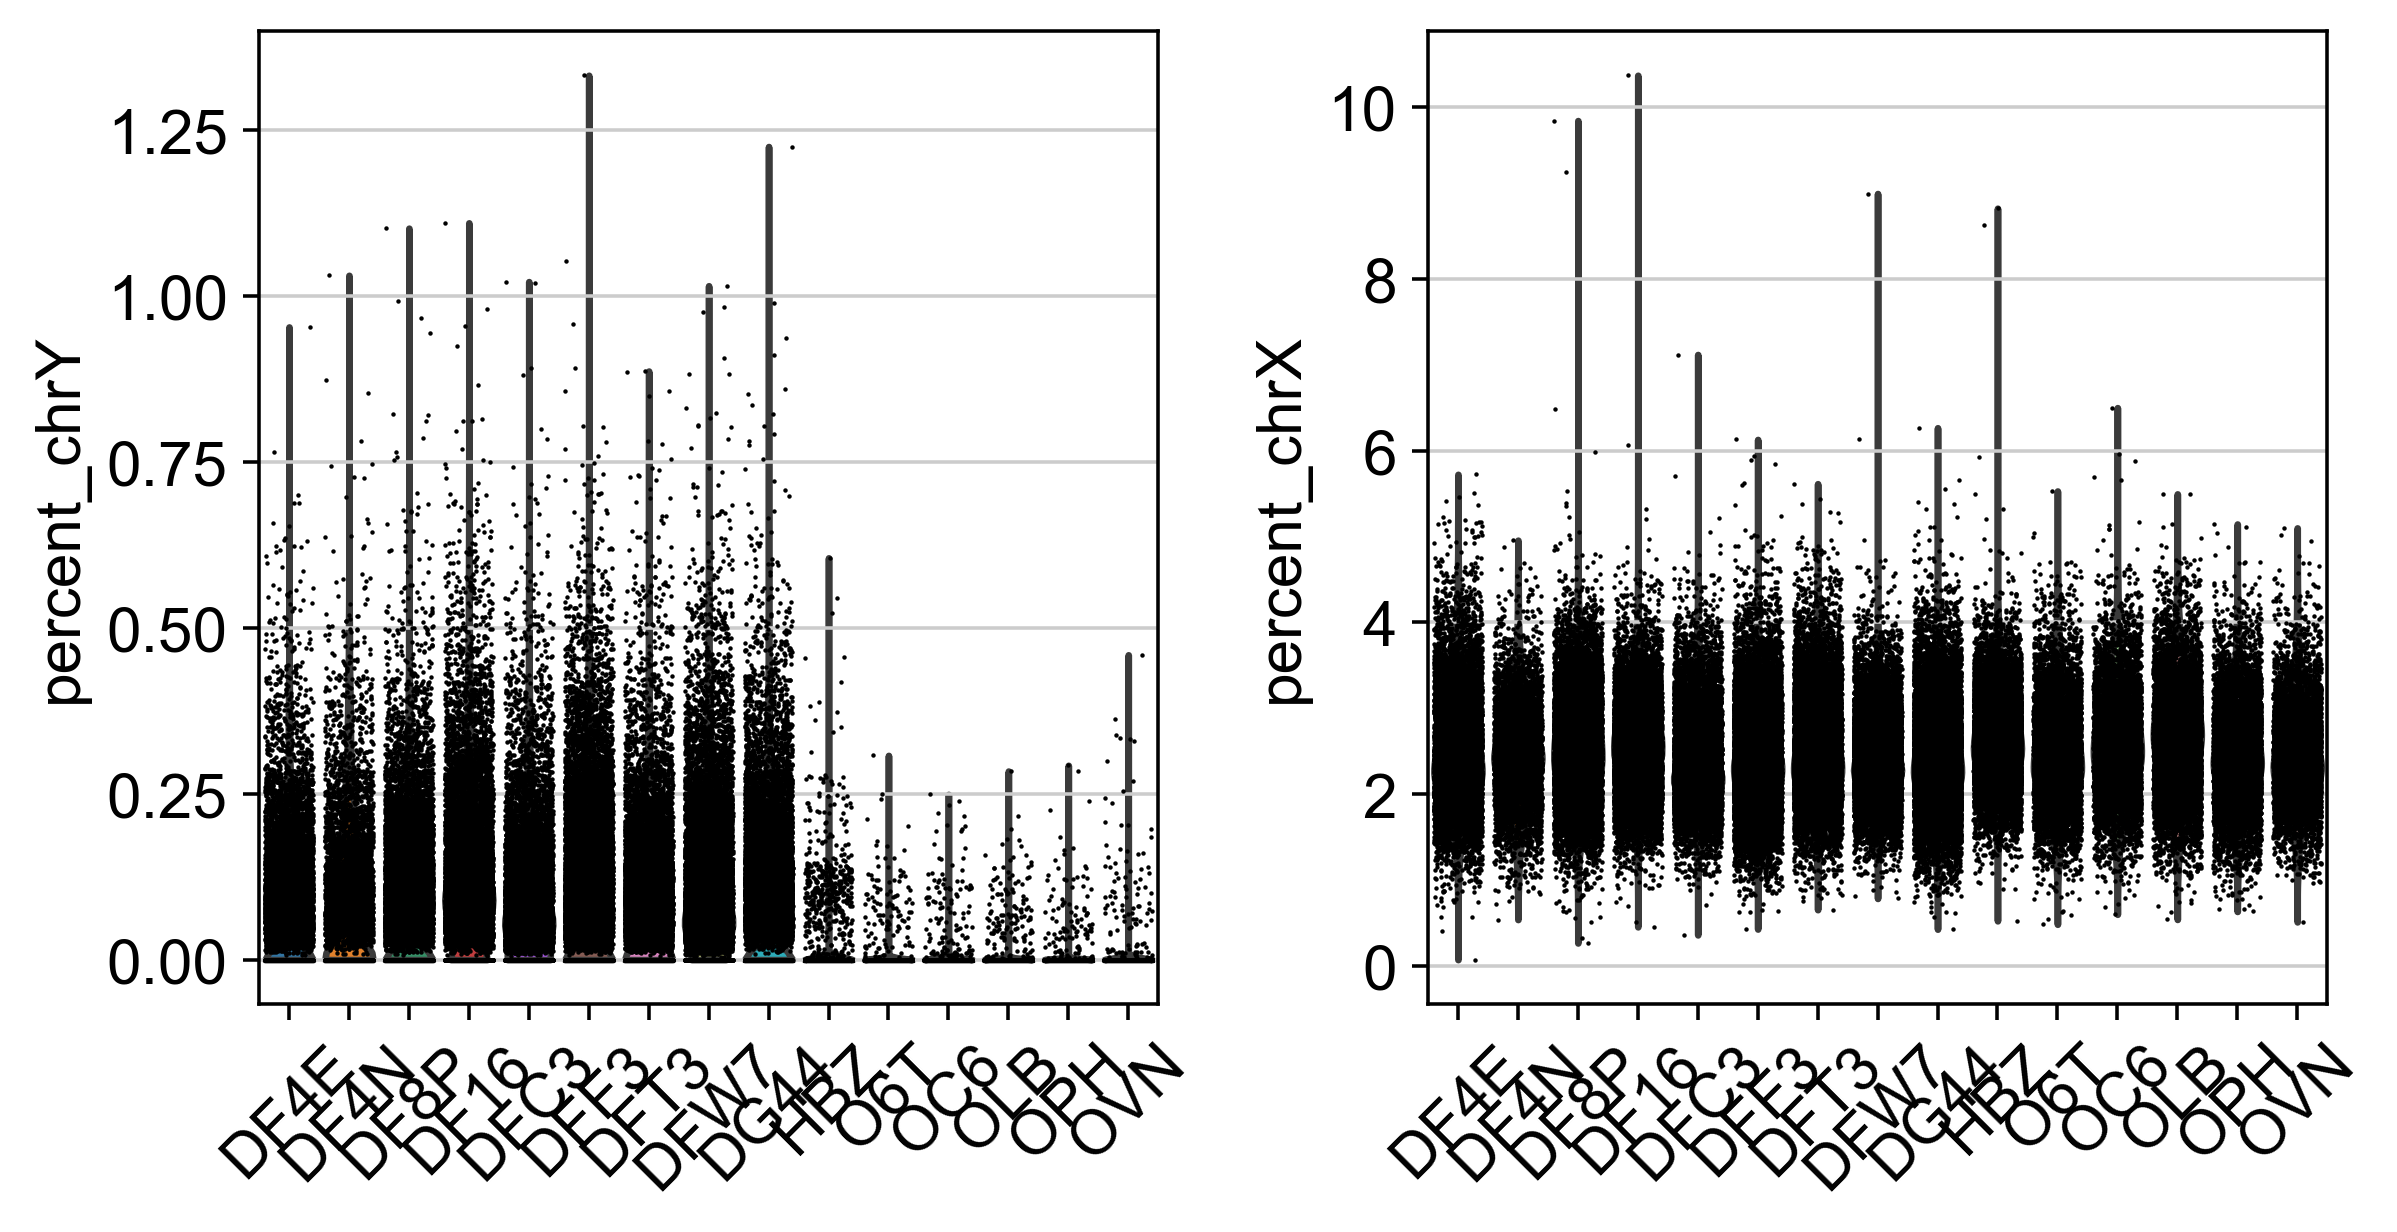

In [38]:
# Re-set figure params
sc.pl.violin(sample_object, ["percent_chrY", "percent_chrX"], jitter = 0.4, groupby = 'donor_id', rotation = 45)

### Cell cycle scores

In [39]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mmulatta_ortho_cell_cycle_genes.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mmulatta_ortho_cell_cycle_genes.txt https://raw.githubusercontent.com/Talavera-Lopez-Lab/Mairi-PhD/main/sc_temp_folder/cell_cycle_genes/mmulatta_ortho_cell_cycle_genes.txt?token=GHSAT0AAAAAACBVCJYZOBAGEVTM6DF3TBR2ZD7JMYA

zsh:1: parse error near `https://raw.githubus...'


In [40]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mmulatta_ortho_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:49]
g2m_genes = cell_cycle_genes[49:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
90


In [41]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ACTG1', 'ALDH1A1', 'APOE', 'B2M', 'CD74', 'CGA', 'CHIT1', 'CLCA1', 'CXCL6', 'CXCL8', 'DNAJB1', 'FCGBP', 'FN1', 'FTL', 'GNLY', 'GZMB', 'HBA1', 'HBA2', 'HBB', 'HSP90AA1', 'HSPA5', 'IFNG', 'IL17F', 'IL5', 'IL9', 'JCHAIN', 'KRT17', 'LOC100423954', 'LOC100426632', 'LOC100430606', 'LOC100430627', 'LOC100499503', 'LOC100499546', 'LOC100499547', 'LOC100499551', 'LOC106993949', 'LOC106999617', 'LOC107000555', 'LOC699418', 'LOC701504', 'LOC708547', 'LOC711062', 'LOC711872', 'LOC715736', 'LOC720054', 'LOC720839', 'MMP9', 'MTRNR2L4', 'NFKBIA', 'PLEK', 'PSAP', 'PTGS2', 'RAB40B', 'SCGB1A1', 'SCGB3A1', 'SFTPA1', 'SFTPB', 'SFTPC', 'SOD2', 'TAOK1', 'THBS1', 'TMSB10', 'TMSB4X', 'TPT1', 'TXN', 'UBB', 'UBC', 'VIM', 'VMO1']
    finished (0:00:01)


calculating cell cycle phase
computing score 'S_score'


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    575 total control genes are used. (0:00:02)
computing score 'G2M_score'


/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    527 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


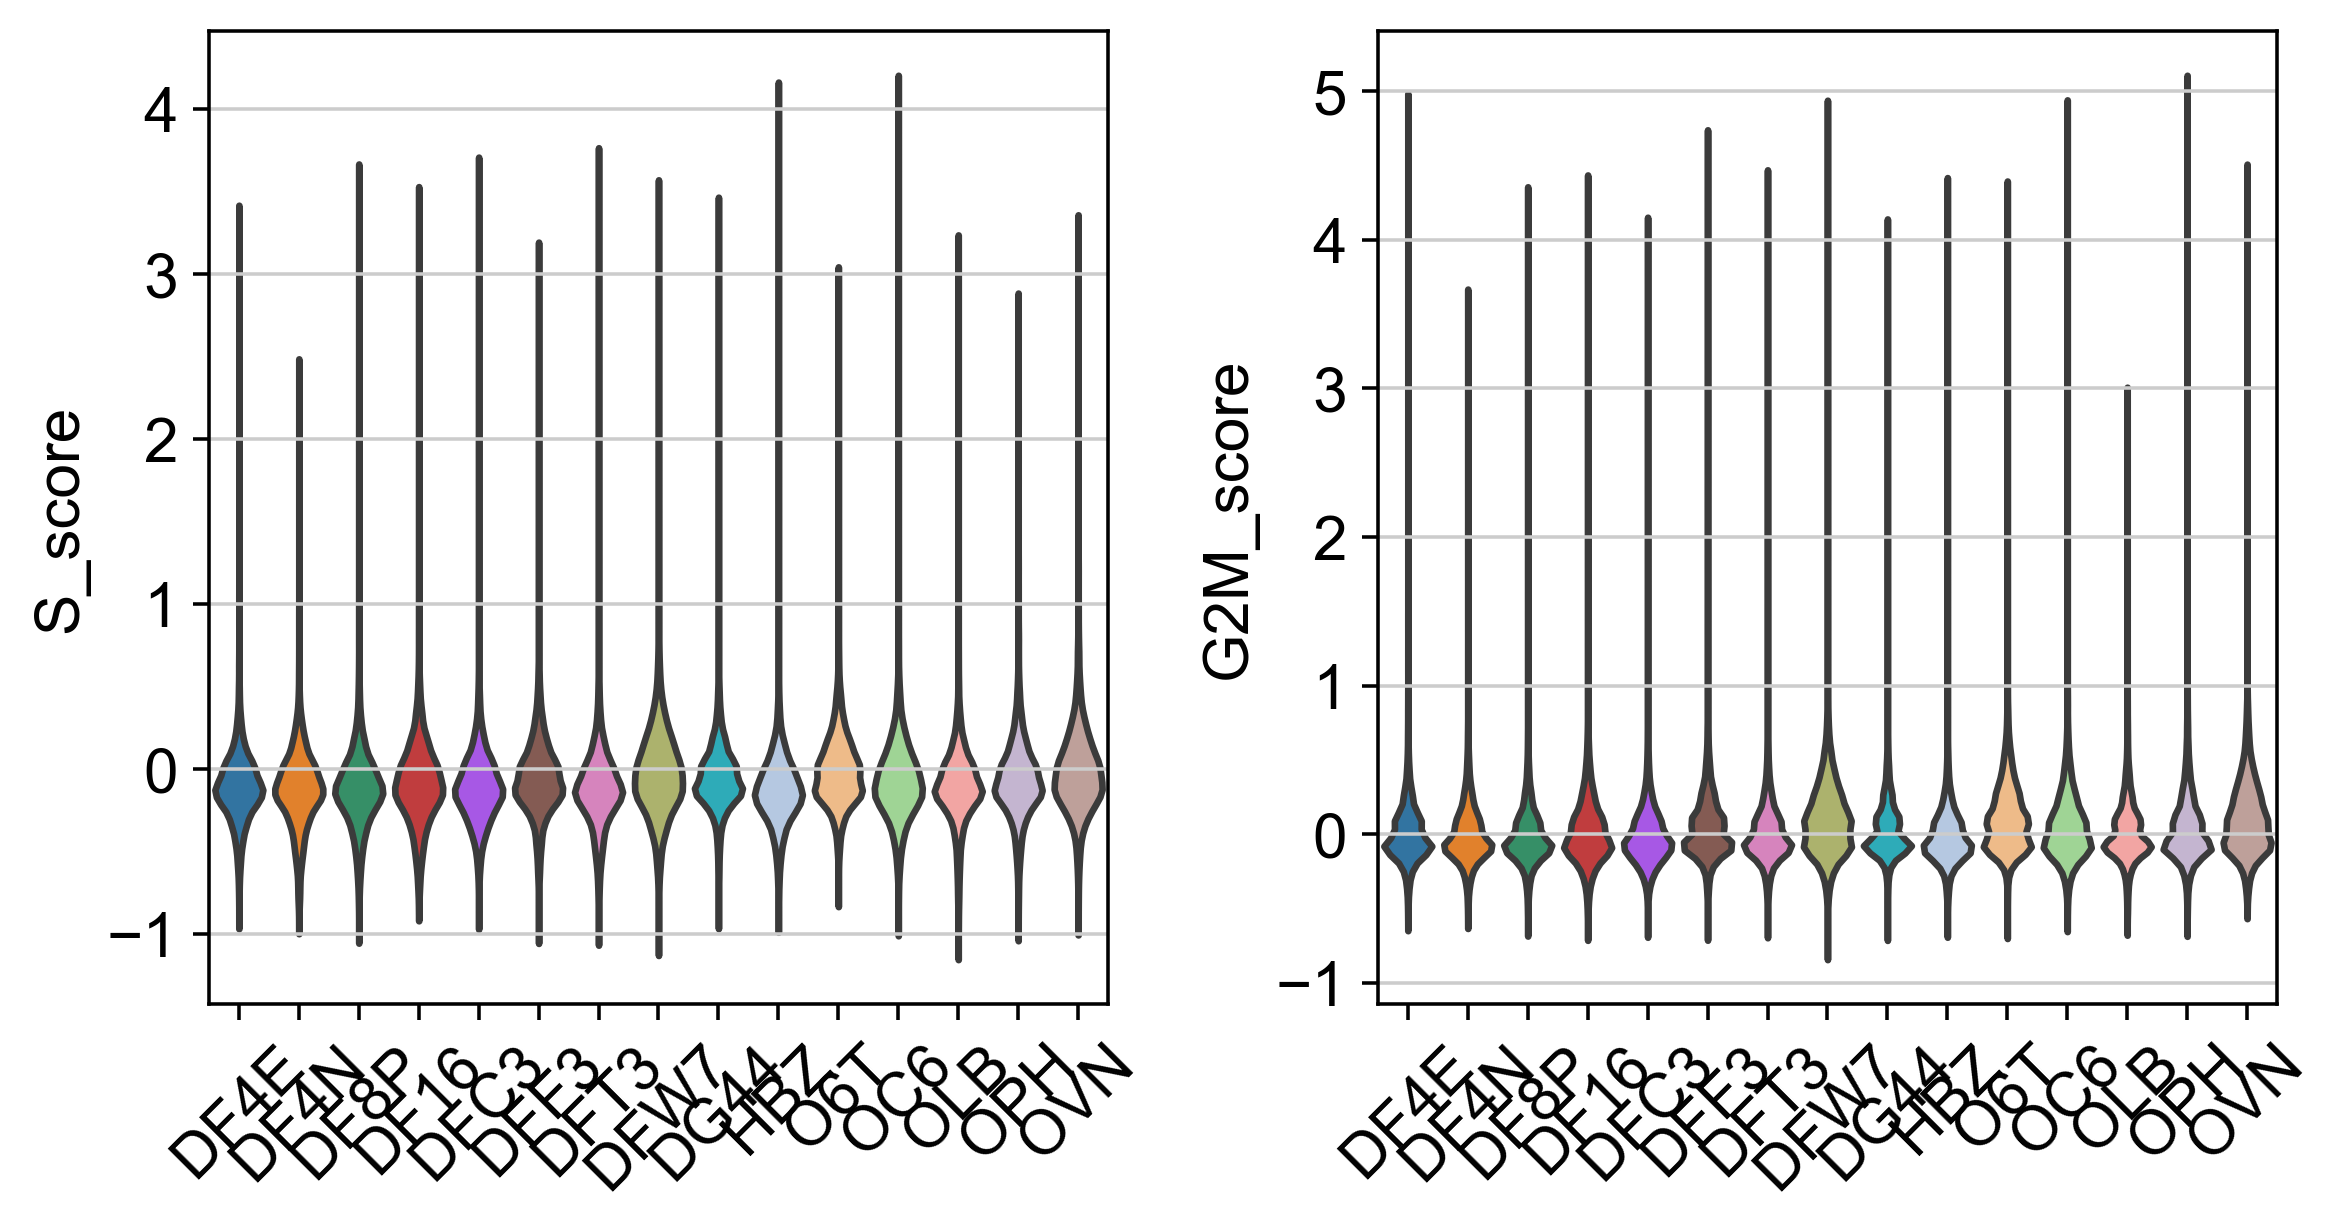

In [42]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor_id', rotation = 45, stripplot=False)

In [43]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 162490 × 31899
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage', 'timepoint', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_sco

### Predict doublets

In [ ]:
import scrublet

In [ ]:
scrub = scrublet.Scrublet(sample_object.X)

In [ ]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()


In [ ]:
sum(sample_object.obs['predicted_doublets'])

In [ ]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor_id', rotation = 45)

### Prepare counts for individual slots

In [ ]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

### Export object

In [ ]:
sample_object.write('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/nhp/Darrah2020_scrna_BAL_mm_230307_qcd.h5ad')